In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
%matplotlib inline


In [38]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)
# 
# from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [39]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,random_state=1,test_size=0.3)

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### RANDOM FOREST 

In [47]:
# X_test=pd.DataFrame(X_test).fillna()

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ytrain_pred=rf.predict_proba(X_train)
print('RANDOM Classifier train in roc-auc : {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf.predict_proba(X_test)
print('Random classifier test in roc-auc : {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))




RANDOM Classifier train in roc-auc : 1.0
Random classifier test in roc-auc : 0.9813055555555554


### LOGISTIC REGRESSION


In [55]:
## Apply RandomForestClassifier
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
ytrain_pred = log_model.predict_proba(X_train)
print('LOGISTIC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('LOGISTIC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

LOGISTIC train roc-auc: 0.9863568922694498
LOGISTIC test roc-auc: 0.9826611111111111


### ADA BOOST

In [56]:
## Apply RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ytrain_pred = ada_model.predict_proba(X_train)
print('ADA-BOOST train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('ADA-BOOST test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

ADA-BOOST train roc-auc: 0.9975081174960356
ADA-BOOST test roc-auc: 0.9826611111111111


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
ytrain_pred = knn_model.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9826611111111111


In [65]:
pred=[]
for  models in [rf_model,log_model,ada_model,knn_model]:
    pred.append(pd.Series(models.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc :{}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc :0.9851111111111112


In [68]:
fpr,tpr,threshold=roc_curve(y_test,final_prediction)

In [70]:
threshold


array([1.91188114, 0.91188114, 0.89982118, 0.89827475, 0.80762555,
       0.80662833, 0.80134271, 0.8005558 , 0.78998136, 0.78821156,
       0.77547605, 0.77537124, 0.72201656, 0.72137362, 0.71475181,
       0.71393711, 0.67288086, 0.67243537, 0.61744697, 0.61114346,
       0.59327749, 0.59300386, 0.59245356, 0.58925354, 0.56345371,
       0.56236186, 0.55494674, 0.54719563, 0.54615858, 0.53127948,
       0.52855932, 0.50116892, 0.44950602, 0.43044916, 0.4271034 ,
       0.39405357, 0.39129719, 0.35683098, 0.34836612, 0.24323004,
       0.24146893, 0.2371341 , 0.23640421, 0.20289681, 0.20098417,
       0.12295384, 0.1228351 , 0.10498954])

In [79]:
from sklearn.metrics import accuracy_score
accuracy_is=[]
for thres in threshold:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_is.append(accuracy_score(y_test,y_pred,normalize=True))
    
#CREATING DF
accuracy_is = pd.concat([pd.Series(threshold),pd.Series(accuracy_is)],axis=1)
accuracy_is.columns = ['THRESHOLD','ACCURACY'] 
accuracy_is.sort_values(by='ACCURACY',ascending=False,inplace=True)
accuracy_is.head()
    

,THRESHOLD,ACCURACY
33,0.430449,0.960000
32,0.449506,0.960000
27,0.547196,0.960000
28,0.546159,0.958333
26,0.554947,0.958333


In [94]:
def roc_auc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label='ROC')
    plt.plot([0,1],[0,1],color='blue',linestyle='--')
    plt.xlabel='FALSE POSITIVE RATE'
    plt.ylabel='TRUE POSITIVE RATE'
    plt.legend()
    plt.show()

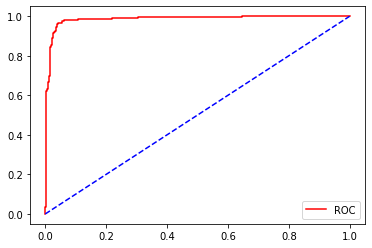

In [95]:
roc_auc_curve(fpr,tpr)